In [4]:
import os
os.chdir("..")

<AxesSubplot:title={'center':'Counter-Strike'}, xlabel='timestamp'>

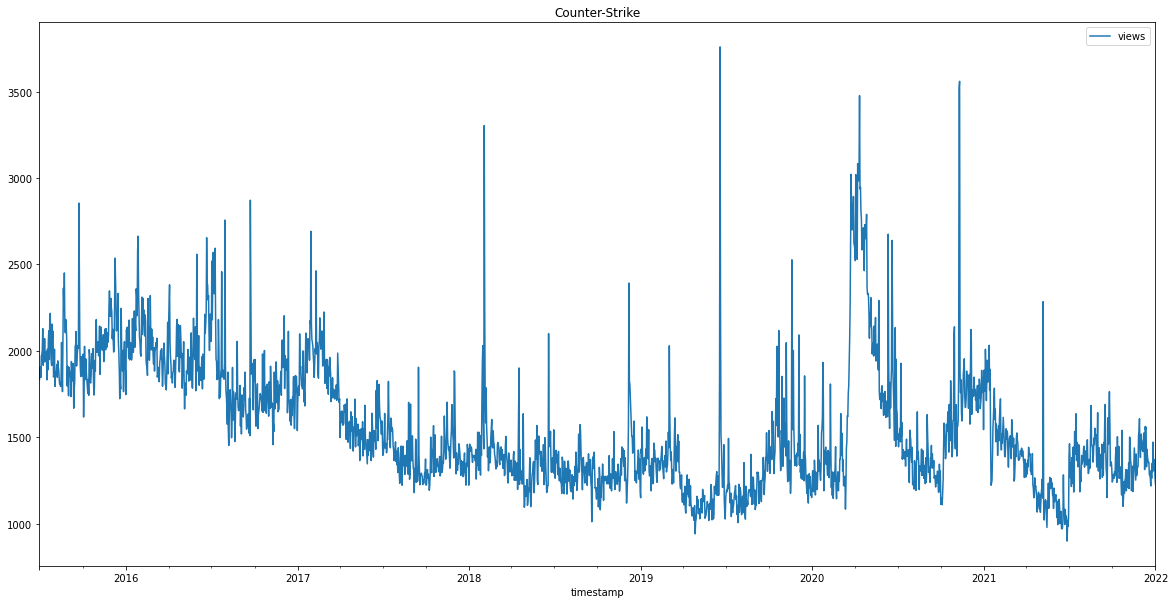

In [127]:
import pandas as pd
import matplotlib.pylab as plt
import random
import numpy as np

plt.rcParams['figure.figsize']=(20,10)
rnd_game = random.choice(os.listdir("Data/Games/"))
df = pd.read_csv('Data/Games/'+rnd_game)
df['timestamp']=pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.plot(title=rnd_game.split(".")[0])


### Understanding the overall structure for the data

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

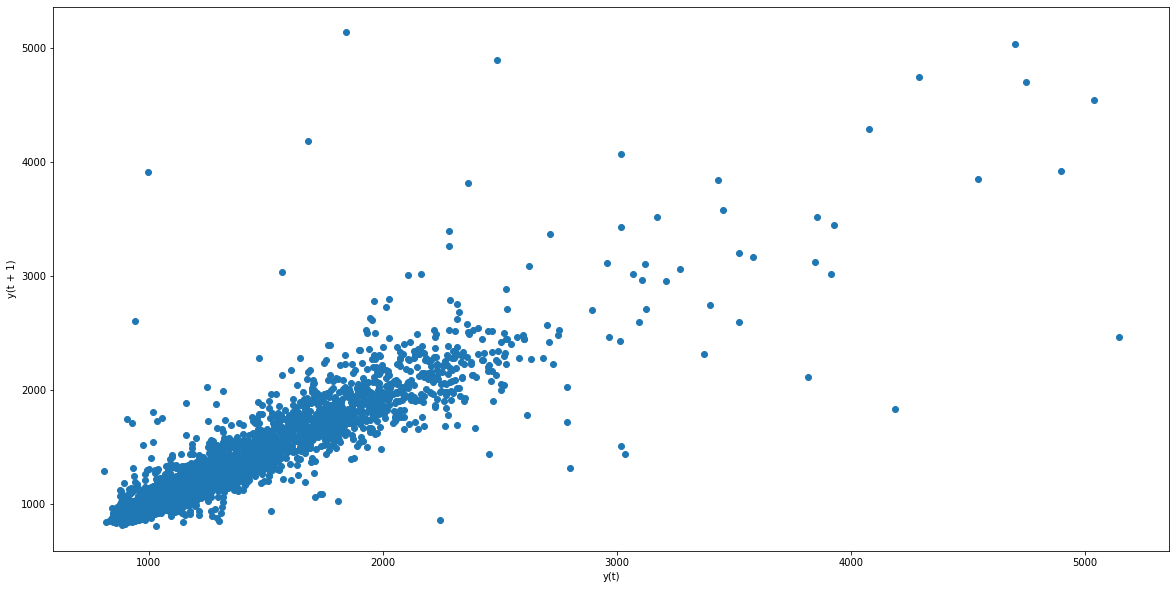

In [6]:

pd.plotting.lag_plot(df["views"])


#### Checking the randomness

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

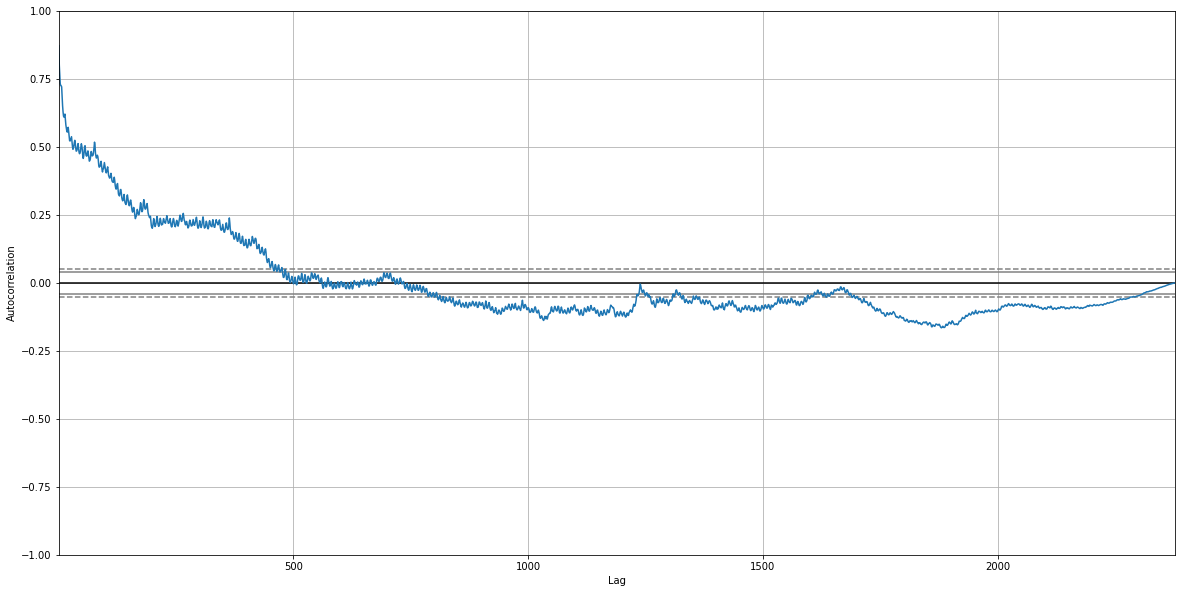

In [7]:
pd.plotting.autocorrelation_plot(df["views"])

#The data during some trends has a high degree of autocorrelation, meanwhile during the normal times it is random.


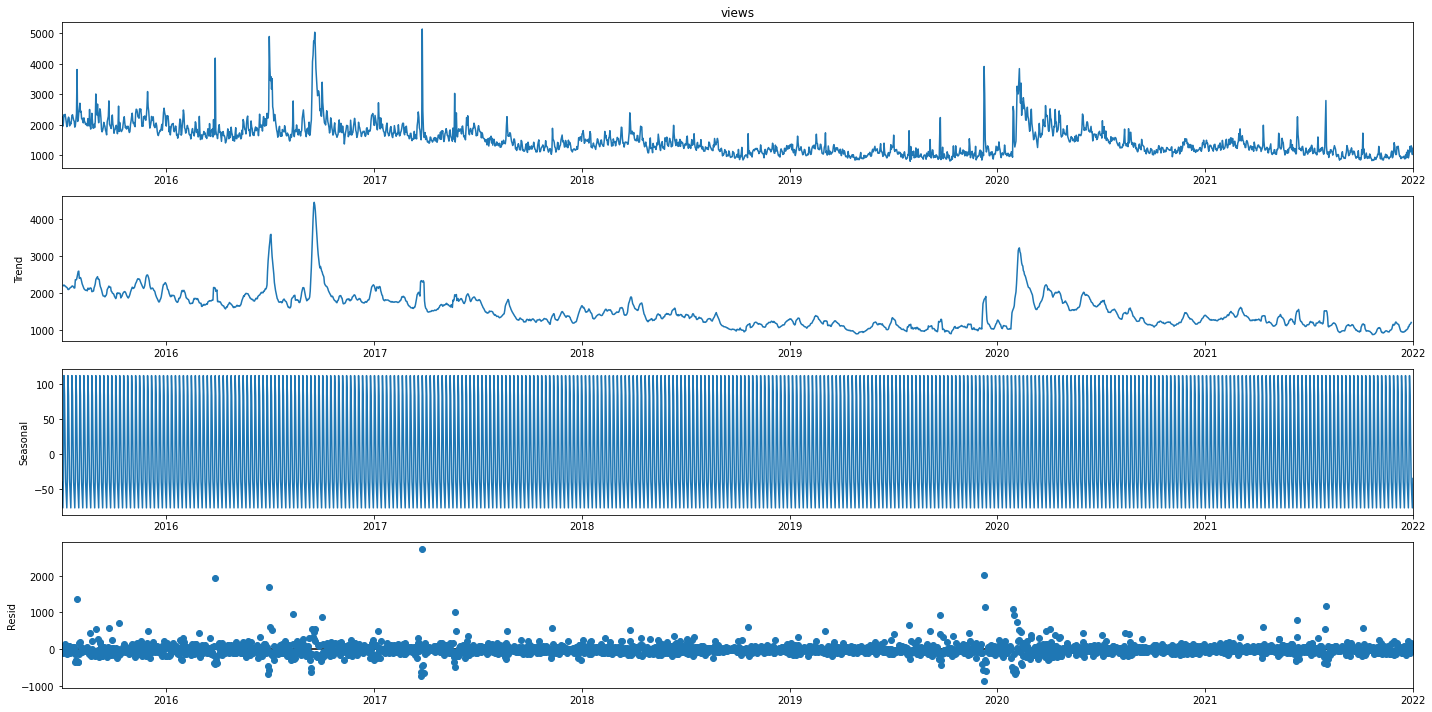

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['views'], model='additive')
x = decomposed.plot()

#The data is trendless as we can see in the 2nd graph

predicted=963.59562128733, expected=1016
predicted=993.0555489684635, expected=916
predicted=1011.6195221415263, expected=1102
predicted=1024.1361892816583, expected=951
predicted=1031.6264960692129, expected=1178
predicted=1024.7282817609105, expected=920
predicted=1032.302462687464, expected=997
predicted=1050.720817435718, expected=1134
predicted=1065.786923559314, expected=1297
predicted=1078.5660697842475, expected=1119
predicted=1088.983178422186, expected=1316
predicted=1089.8673272644673, expected=1255
predicted=1089.1326032376246, expected=1032
predicted=1097.8858139442555, expected=1226
Test RMSE: 0.313


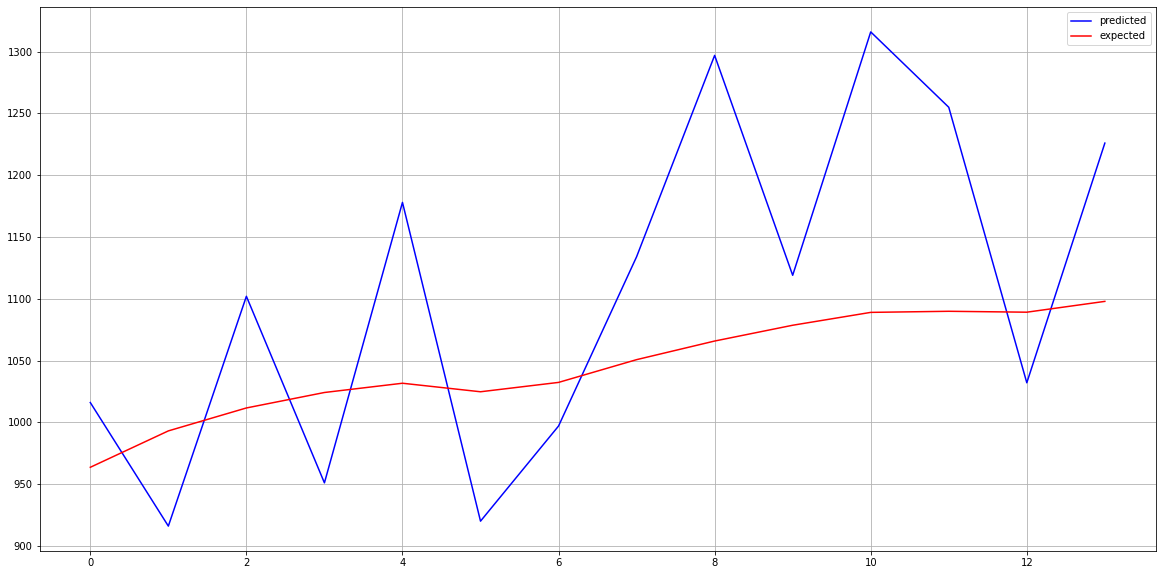

In [9]:
from statsmodels.tsa.ar_model import AutoReg

def smape(target, forecast):
  if type(target) == pd.core.frame.DataFrame:
    target = target.values

  denominator = np.abs(target) + np.abs(forecast)
  flag = denominator == 0.

  smape = 2 * np.mean(
      (np.abs(target - forecast) * (1 - flag)) / (denominator + flag)
  )
  return smape


time_to_predict = 14
best_lag = 0
best_smape = 999999999
# split dataset
data = df['views'].values
train, test = data[1:len(data)-time_to_predict], data[len(data)-time_to_predict:]
# train autoregression

#for i in range(1,300):
model = AutoReg(train, lags=13)
model_fit = model.fit()

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print(f'predicted={predictions[i]}, expected={test[i]}')
smapeValue = np.sqrt(smape(test, predictions))
#if smapeValue < best_smape:
	#best_smape = smapeValue
	#best_lag = i
print(f'Test RMSE: {smapeValue:.3f}')

#print(best_lag)
#print(best_smape)

# plot results
plt.plot(test,color="blue",label="predicted")
plt.plot(predictions, color='red',label="expected")
plt.legend()
plt.grid(True)
plt.show()